In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
import gala.coordinates as gc
import h5py

In [3]:
plt.style.use('notebook')

In [30]:
# parabola along Pal5
p = [0.018,0.14,-0.7]
p = [0.018,0.14,0]
poly_track_coarse = np.poly1d(p)

In [4]:
# read profiles
t = Table.read('../data/combined_params_1d.fits')
ind_sort = np.argsort(t['phi1'])
t = t[ind_sort]

In [31]:
# read members
tp = Table.read('../data/members_only.fits')

In [32]:
ceq = coord.SkyCoord(ra=tp['ra']*u.deg, dec=tp['dec']*u.deg, frame='icrs')
cpal = ceq.transform_to(gc.Pal5)

wangle = 180*u.deg

In [29]:
row_labels = ['$\phi_2$ [deg]', '$\phi_2$ [deg]', '$\Delta\phi_2$ [deg]', 'N', '$\sigma$ [deg]']

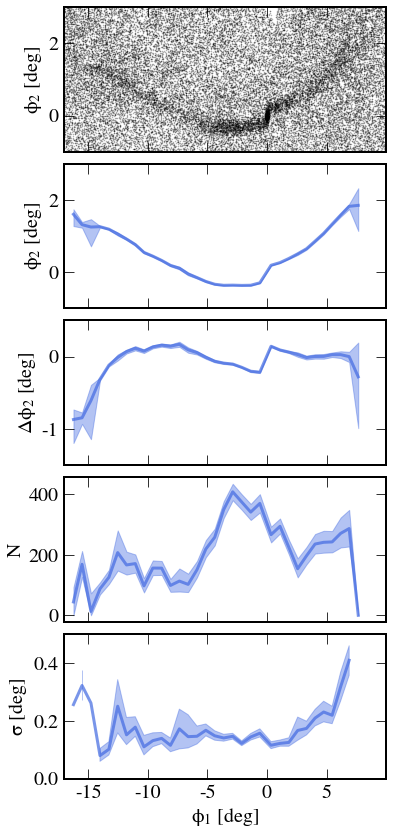

In [33]:
fig, ax = plt.subplots(5,1,figsize=(6,12), sharex='col', sharey='row')

plt.sca(ax[0])
plt.plot(cpal.phi1.wrap_at(wangle), cpal.phi2, 'k.', ms=3, mec='none', alpha=0.3, rasterized=True)
plt.xlim(-17,10)
plt.ylim(-1,3)

plt.sca(ax[1])
plt.plot(t['phi1'], t['phi2'], '-', color='royalblue', lw=3, alpha=0.7, zorder=1, label='Observed')
plt.fill_between(t['phi1'], t['phi2'] + t['phi2_ep'], t['phi2'] - t['phi2_em'], color='royalblue', alpha=0.4,
                label='')
plt.ylim(-1,3)

plt.sca(ax[2])
plt.plot(t['phi1'], t['phi2'] - poly_track_coarse(t['phi1']),
             '-', color='royalblue', lw=3, alpha=0.7, zorder=1)
plt.fill_between(t['phi1'], t['phi2'] + t['phi2_ep'] - poly_track_coarse(t['phi1']),
                 t['phi2'] - t['phi2_em'] - poly_track_coarse(t['phi1']), color='royalblue', alpha=0.4, label='')
plt.ylim(-1.5,0.5)

plt.sca(ax[3])
plt.plot(t['phi1'], t['n'], '-', color='royalblue', lw=3, alpha=0.7)
plt.fill_between(t['phi1'], t['n'] + t['n_ep'], t['n'] - t['n_em'], color='royalblue', alpha=0.4)

plt.sca(ax[4])
plt.plot(t['phi1'], t['w'], '-', color='royalblue', lw=3, alpha=0.7)
plt.fill_between(t['phi1'], t['w'] + t['w_ep'], t['w'] - t['w_em'], color='royalblue', alpha=0.4)
plt.xlabel('$\phi_1$ [deg]')
plt.gca().set_xticks([-15,-10,-5,0,5])
plt.ylim(0,0.5)


for i in range(5):    
    plt.sca(ax[i])
    plt.ylabel(row_labels[i])

plt.tight_layout(h_pad=0, w_pad=0.4)
# plt.savefig('../plots/model_comparison.png', dpi=200)
plt.savefig('../paper/observed_profiles.pdf', dpi=200)